In [ ]:
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive')

In [1]:
# Importing necessary libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as CM
import seaborn as sns
from pandas.io.json import json_normalize
import datetime as datetime
from datetime import timedelta, date
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import GridSearchCV, train_test_split, GroupKFold
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.style.use('fivethirtyeight')

In [ ]:
# # After executing the cell above, Drive
# # files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive/Colab Notebooks/ML_Project/Data/"

In [2]:
%%time

# Save the flattened data set
df_train = pd.read_csv("./Data/train-flattened.csv", 
                       dtype={'fullVisitorId': 'str'}, index_col='sessionId')

CPU times: user 6.29 s, sys: 428 ms, total: 6.71 s
Wall time: 6.49 s


In [ ]:
pd.set_option('display.max_columns', None)
df_train.sample(3)

In [ ]:
print(df_train["device_browser"].unique())

df_train[(df_train.device_browser=='Nintendo Browser') & 
         (df_train.device_isMobile)].shape[0]/df_train[df_train.device_browser=='Nintendo Browser'].shape[0]


In [4]:
# Replace the low frequency values with other in the 'device_operatingSystem' column
df_train['device_operatingSystem'] = np.where(df_train['device_operatingSystem'].isin(['Windows', 'Macintosh', 'Android', 'iOS', 'Linux', 'Chrome OS']),
        df_train['device_operatingSystem'], 'other')

In [5]:
# Replace the low frequency values with other in the 'device_browser' column
df_train['device_browser'] = np.where(df_train['device_browser'].isin(['Chrome', 'Safari', 'Firefox', 'Internet Explorer', 'Edge', 
                                                                       'Android Webview', 'Safari (in-app)', 'Opera Mini', 'Opera']),
        df_train['device_browser'], 'other')

In [ ]:
df_train["device_browser"].value_counts()

In [6]:
# Encoding predictors
# For those with few labels, creats a 0/1 column for each label

cat_few_label_cols = ["channelGrouping", "device_browser", "device_deviceCategory", "device_operatingSystem", 
                      "_year", "_month", "_dayofWeek", "_hour"]
                     
    
df_train = pd.get_dummies(df_train, columns=cat_few_label_cols, drop_first=True)

In [8]:
# Drop those variables for which we have created dummy
# x_ = df_train.drop(["device.browser","device.deviceCategory","trafficSource.adwordsClickInfo.adNetworkType","trafficSource.adwordsClickInfo.slot"], axis=1).astype('float64')

# Split to X_train and y_train

X_train = df_train.drop(['totals_transactionRevenue'], axis=1)
y_train = df_train["totals_transactionRevenue"]

X_train = X_train.drop(['fullVisitorId','visitId','device_isMobile','geoNetwork_city','geoNetwork_continent','geoNetwork_country','geoNetwork_metro',
             'geoNetwork_networkDomain','geoNetwork_region','geoNetwork_subContinent','trafficSource_adContent',
             'trafficSource_adwordsClickInfo.adNetworkType','trafficSource_adwordsClickInfo.gclId','trafficSource_adwordsClickInfo.isVideoAd',
             'trafficSource_adwordsClickInfo.page','trafficSource_adwordsClickInfo.slot','trafficSource_campaign','trafficSource_isTrueDirect',
             'trafficSource_keyword','trafficSource_medium','trafficSource_referralPath','trafficSource_source','_day'], axis=1)

print(X_train.shape, y_train.shape)

pd.set_option('display.max_columns', None)
X_train.sample(3)

(902755, 68) (902755,)


,visitNumber,totals_hits,totals_pageviews,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device_browser_Chrome,device_browser_Edge,device_browser_Firefox,device_browser_Internet Explorer,device_browser_Opera,device_browser_Opera Mini,device_browser_Safari,device_browser_Safari (in-app),device_browser_other,device_deviceCategory_mobile,device_deviceCategory_tablet,device_operatingSystem_Chrome OS,device_operatingSystem_Linux,device_operatingSystem_Macintosh,device_operatingSystem_Windows,device_operatingSystem_iOS,device_operatingSystem_other,_year_2017,_month_2,_month_3,_month_4,_month_5,_month_6,_month_7,_month_8,_month_9,_month_10,_month_11,_month_12,_dayofWeek_1,_dayofWeek_2,_dayofWeek_3,_dayofWeek_4,_dayofWeek_5,_dayofWeek_6,_hour_1,_hour_2,_hour_3,_hour_4,_hour_5,_hour_6,_hour_7,_hour_8,_hour_9,_hour_10,_hour_11,_hour_12,_hour_13,_hour_14,_hour_15,_hour_16,_hour_17,_hour_18,_hour_19,_hour_20,_hour_21,_hour_22,_hour_23
sessionId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7857857164882962811_1477965523,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5162190483662032372_1495538160,2,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
635377746488527509_1501383507,2,2,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.info()


In [10]:
# Simple Regression with no lambda before splitting the data

reg = LinearRegression().fit(X_train, y_train)
#pred2 = ridge2.predict(X_test_spl) # Use this model to predict the test data
#print(pd.Series(reg.coef_, index=X_train.columns).sort_values()) # Print coefficients
#print(mean_squared_error(y_test_spl, pred2)) # Calculate the test MSE

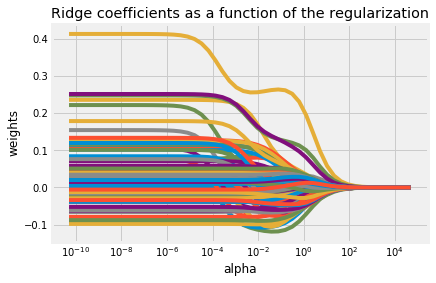

CPU times: user 1min 26s, sys: 32.3 s, total: 1min 58s
Wall time: 1min 14s


In [11]:
%%time

# Ridge regression before splitting the data for cross-validation

# Ridge regression
alphas = 10**np.linspace(5,-10,50)*0.5 # alphas (lambdas!)


ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
  ridge.set_params(alpha=a)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_)
  

# plot the coefficients as a function of lambda
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [37]:
# getting group folds
visitorIDs = np.array(df_train['fullVisitorId'])
GKFolds = GroupKFold(n_splits=5)

len(list(GKFolds.split(X=X_train, y=y_train, groups=visitorIDs))[2][1])

180551

In [21]:
#Cross validation for Ridge
ridgecv = RidgeCV(alphas=alphas, normalize=True, scoring='neg_mean_squared_error',
                  cv=GKFolds.split(X=X_train, y=y_train, groups=visitorIDs))
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)

pred = ridgecv.predict(X_train)
pred[pred<0] = 0

print("mse = ", mean_squared_error(y_train, pred))
print("best model coefficients:")
pd.Series(ridgecv.coef_, index=X_train.columns)

Alpha= 6.628556827950554e-05
mse =  3.294976370808154
best model coefficients:


visitNumber                         0.000601
totals_hits                        -0.091633
totals_pageviews                    0.235676
channelGrouping_Affiliates          0.012639
channelGrouping_Direct              0.109780
channelGrouping_Display             0.060942
channelGrouping_Organic Search      0.011551
channelGrouping_Paid Search         0.032906
channelGrouping_Referral            0.369195
channelGrouping_Social              0.177223
device_browser_Chrome               0.041447
device_browser_Edge                 0.024044
device_browser_Firefox              0.030923
device_browser_Internet Explorer    0.074025
device_browser_Opera                0.046732
device_browser_Opera Mini           0.077397
device_browser_Safari              -0.066106
device_browser_Safari (in-app)     -0.063084
device_browser_other                0.101796
device_deviceCategory_mobile        0.030822
device_deviceCategory_tablet       -0.015718
device_operatingSystem_Chrome OS    0.246280
device_ope

In [ ]:
#Another Ridge regression before splitting the data

n_alphas = 20
alphas = 10**np.linspace(5,-10,50)*0.5

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
#LASSO

lasso = Lasso(max_iter=1000, normalize=True)
alphas = 10**np.linspace(5,-5,10)*0.5
coefs = []
for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(scale(X_train), y_train)
  coefs.append(lasso.coef_)
  
  
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [42]:
#Cross validation for LASSO, Group K-Fold

lasso_cv = LassoCV(alphas=None, normalize=True, max_iter=100000, 
                  cv=GKFolds.split(X=X_train, y=y_train, groups=visitorIDs))
lasso_cv.fit(X_train, y_train)
print("Alpha=", lasso_cv.alpha_)

# obtaining the predictions
lasso_pred = lasso_cv.predict(X_train)
lasso_pred[lasso_pred<0] = 0

print("mse = ", mean_squared_error(y_train, lasso_pred), 'cv_score = ', lasso_cv.score(X_train, y_train))
print("best model coefficients:")
pd.Series(lasso_cv.coef_, index=X_train.columns)

Alpha= 8.463898867013765e-07
mse =  3.296181635265407 cv_score =  0.17496945327261315
best model coefficients:


visitNumber                         0.000535
totals_hits                        -0.087130
totals_pageviews                    0.229482
channelGrouping_Affiliates         -0.091744
channelGrouping_Direct              0.000000
channelGrouping_Display            -0.035000
channelGrouping_Organic Search     -0.095006
channelGrouping_Paid Search        -0.070013
channelGrouping_Referral            0.262468
channelGrouping_Social              0.063235
device_browser_Chrome               0.011722
device_browser_Edge                -0.000000
device_browser_Firefox              0.000000
device_browser_Internet Explorer    0.044466
device_browser_Opera                0.007408
device_browser_Opera Mini           0.052544
device_browser_Safari              -0.084632
device_browser_Safari (in-app)     -0.068952
device_browser_other                0.057233
device_deviceCategory_mobile       -0.046357
device_deviceCategory_tablet       -0.086459
device_operatingSystem_Chrome OS    0.159952
device_ope

In [ ]:
%%time

# Save the encoded data set
df_train.to_csv("/content/drive/My Drive/Colab Notebooks/ML_Project/Data/train-encoded.csv", index=True)

In [ ]:
%%time

# Save the encoded data set
train_encoded = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML_Project/Data/train-flattened.csv', dtype={'fullVisitorId': 'str'})

print(train_encoded.head(3))